In [5]:
import numpy as np
import pandas as pd
import scipy as s, scipy.stats as ss
import seaborn as sb
import random as rd
import math as m
from datetime import date, datetime, time, timedelta
%matplotlib inline
import matplotlib.pyplot as plt

r = np.random.random_integers(500,size=500)
a_vehicle = np.random.random_integers(500)
v = ss.poisson(3).rvs(1)
w = rd.expovariate(15)
w,v[0]
#choose a vehicle at random
parts = ['P0','P1','P2','P3','P4','P5','P6','P7','P8','P9']
services = ['S0','S1','S2']


cd1 = {
      'Count' : np.random.random_integers(5,10),
      #planned and unplanned services
      'PS':  {'pfreq':60, 'cost': 100} ,
      'UPS': {'pfreq':120, 'cost': 100},
      #parts
      'PO':  {'pfreq':40, 'cost': 10},
      'P1':  {'pfreq':60, 'cost': 20},
      'P2':  {'pfreq':800, 'cost': 40},
      'P3':  {'pfreq':55, 'cost': 60},
      'P4':  {'pfreq':120, 'cost': 10},
      'P5':  {'pfreq':41, 'cost': 100},
       #events
      'Fuel':{'pfreq':7, 'cost':15},# ('N',20,1)
      'E1':  {'pfreq':21, 'cost': 0}
     };

cd2 = {
      'Count' : np.random.random_integers(5,20),
      #planned and unplanned services
      'PS':  {'pfreq':60, 'cost': 100} ,
      'UPS': {'pfreq':200, 'cost': 100},
      #parts
      'PO':  {'pfreq':100, 'cost': 10},
      'P1':  {'pfreq':60, 'cost': 20},
      'P2':  {'pfreq':10, 'cost': 10},
      'P3':  {'pfreq':55, 'cost': 60},
      'P4':  {'pfreq':90, 'cost': 10},
      'P5':  {'pfreq':41, 'cost': 100},
       #events
      'Fuel':{'pfreq':7, 'cost': 15}, #('N',20,1)
      'E1':  {'pfreq':21, 'cost': 0}
     };

cd3 = {
      'Count' : np.random.random_integers(5,40),
      #planned and unplanned services
      'PS':  {'pfreq':60, 'cost': 10} ,
      'UPS': {'pfreq':20, 'cost': 10},
      #parts
      'PO':  {'pfreq':40, 'cost': 10},
      'P1':  {'pfreq':60, 'cost': 20},
      'P2':  {'pfreq':10, 'cost': 30},
      'P3':  {'pfreq':55, 'cost': 60},
      'P4':  {'pfreq':120, 'cost': 10},
      'P5':  {'pfreq':41, 'cost': 100},
       #events
      'Fuel':{'pfreq':7, 'cost': 45}, #('N',20,1)
      'E1':  {'pfreq':21, 'cost': 0}
     };

cd4 = {
      'Count' : np.random.random_integers(10,30),
      #planned and unplanned services
      'PS':  {'pfreq':60, 'cost': 100} ,
      'UPS': {'pfreq':120, 'cost': 100},
      #parts
      'PO':  {'pfreq':40, 'cost': 10},
      'P1':  {'pfreq':60, 'cost': 20},
      'P2':  {'pfreq':600, 'cost': 40},
      'P3':  {'pfreq':55, 'cost': 190},
      'P4':  {'pfreq':120, 'cost': 10},
      'P5':  {'pfreq':41, 'cost': 100},
       #events
      'Fuel':{'pfreq':7, 'cost': 25}, #('N',20,1)
      'E1':  {'pfreq':21, 'cost': 0}
     };

cd5 = {
      'Count' : np.random.random_integers(5,20),
      #planned and unplanned services
      'PS':  {'pfreq':60, 'cost': 100} ,
      'UPS': {'pfreq':120, 'cost': 100},
      #parts
      'PO':  {'pfreq':40, 'cost': 10},
      'P1':  {'pfreq':60, 'cost': 20},
      'P2':  {'pfreq':800, 'cost': 40},
      'P3':  {'pfreq':55, 'cost': 60},
      'P4':  {'pfreq':120, 'cost': 10},
      'P5':  {'pfreq':41, 'cost': 100},
       #events
      'Fuel':{'pfreq':7, 'cost': 15}, #('N',20,1)
      'E1':  {'pfreq':21, 'cost': 0}
     };
descriptors = [cd1,cd2,cd3, cd4,cd5]


In [8]:
#date generators
def randomTimeOfDay(n = 1):
    h= int((3.5 * np.random.randn(1) + 14)[0]) % 24
    m = np.random.random_integers(0,59)
    s = np.random.random_integers(0,59)  
    return (time(h, m, s, 0))

def nextDay(rateParameter):
    return -m.log(1.0 - rd.random()) / rateParameter

def cummulativeWaitingDays(rate,n):
    offset = 0;
    for i in range(n):
        offset = offset + nextDay(rate)
        yield int(offset)
        
def poissonDates(startDate, rate,n):
    for d in cummulativeWaitingDays(rate,10):
        yield datetime.combine(startDate + timedelta(days=d), randomTimeOfDay())
        
#for dt in poissonDates(date(2016, 1, 1), 1/7, 10):
#    print (dt)  

In [10]:
#from dictionary list
timeseries = pd.DataFrame(columns=('Vehicle', 'Class', 'Date', 'Event', 'Cost'))

vdata = []
vid = 0;
classid = 1
for dic in descriptors:
    offset = 1;
    for i in range(int(dic['Count'])):
        vid = i + offset ##increment vehicle id
        vdata.append((vid,classid))
        for key, val in dic.items():
            if(key != 'Count'):
                rate = 1.0/val['pfreq']
                cost = val['cost']
                for dt in poissonDates(date(2016, 1, 1), rate, 10):
                  #print rate
                    #foreach of these vehicles, foreach of these create a poisson date list
                    #oreach date list add an event with the given cost type
                  timeseries.loc[len(timeseries)] = [vid,classid,dt,key,cost]
        
    offset = vid
    classid = classid + 1
    
#df.set_index(pd.DatetimeIndex(timeseries['Date']))
timeseries

,Vehicle,Class,Date,Event,Cost
0,1,1,2016-05-15 10:52:25,P3,60
1,1,1,2016-05-28 15:47:24,P3,60
2,1,1,2016-06-02 11:59:56,P3,60
3,1,1,2016-08-10 10:20:05,P3,60
4,1,1,2016-09-05 09:40:01,P3,60
5,1,1,2017-03-01 11:48:45,P3,60
6,1,1,2017-04-08 19:51:34,P3,60
7,1,1,2018-03-25 07:51:21,P3,60
8,1,1,2019-02-25 17:09:35,P3,60
9,1,1,2019-04-04 11:58:39,P3,60


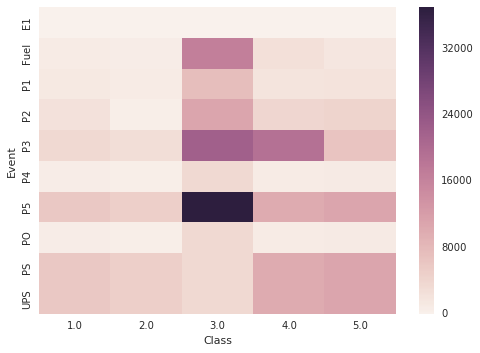

In [11]:
myts = timeseries.set_index(pd.DatetimeIndex(timeseries['Date']))
myts.sort_index(inplace=True)
#myts = myts.reset_index()

grp = myts.groupby(['Event', 'Class'])['Cost'].sum().reset_index()

pv = grp.pivot(index='Event', columns='Class', values='Cost')

#myts = myts[['index','Vehicle','Class','Event','Cost']]

#myts=myts['20130419':'20160401']
#myts.resample('D')['Cost'].plot()

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

ax = sns.heatmap(pv)